In [1]:
import unicodedata
import re
import json
import matplotlib as plt
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
import collections
import prep

df= pd.read_json('data.json')
df.head()

df=pd.DataFrame(df)

df=prep.basic_clean(df)
df.head()

#Remove characters between [] and <>
df.readme_contents
for contents in df.readme_contents:
    re.sub(r" ?\([^)]+\)", " ", contents)
    re.sub(r" ?\(<^>]+\)", " ", contents)
    if len(contents)>8

In [2]:
df= pd.read_csv("test.csv")
df = df.dropna()
df = df[df.clean_contents.apply(len) > 200]


In [87]:
#Breakdown of languages within the DataFramne
languages = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
languages.columns = ['n', 'percent']
languages

,n,percent
JavaScript,128,0.267223
Python,121,0.252610
Java,121,0.252610
PHP,109,0.227557


In [108]:
top_words= pd.Series(" ".join(df.clean_contents).split()).value_counts()[2:65]
top_words

python         1846
c              1723
php            1615
using          1479
function       1325
code           1263
new            1184
support        1184
library        1148
project        1109
data           1055
run             940
example         939
return          934
install         931
source          925
javascript      893
default         893
class           888
also            873
react           863
open            844
version         844
application     833
api             811
yes             794
see             781
web             762
object          761
native          759
               ... 
value           748
server          725
list            722
method          715
image           710
simple          705
de              702
make            701
one             697
like            693
used            688
user            671
need            671
java            668
system          665
get             657
command         655
mit             654
request         647


In [18]:
py_words = pd.Series(df[df.language == 'Python'].content_words.sum())
java_words = pd.Series(df[df.language == 'Java'].content_words.sum())
js_words = pd.Series(df[df.language == 'JavaScript'].content_words.sum())
php_words = pd.Series(df[df.language == 'PHP'].content_words.sum())
#all_words= pd.Series(df[df.language==[all]].content_words.sum())
py_words= py_words.value_counts()[0:100].index
java_words=java_words.value_counts()[0:100].index
js_words=js_words.value_counts()[0:100].index
php_words=php_words.value_counts()[0:100].index
#all_words= all_words.value_counts()[0:100].index



Index(['php', 'use', 'function', 'class', 'new', 'file', 'method', 'using',
       'default', 'value', 'return', 'promise', 'check', 'public', 'code',
       'project', 'composer', 'echo', 'array', 'support', 'version', 'library',
       'one', 'add', 'option', 'name', 'string', 'object', 'test', 'also',
       'configuration', 'run', 'require', 'need', 'example', 'user', 'type',
       'used', 'laravel', 'ha', 'please', 'see', 'set', 'client', 'request',
       'like', 'install', 'must', 'want', 'call', 'package', 'following',
       'license', 'get', 'command', 'bash', 'make', 'rule', 'data',
       'extension', 'risky', 'line', 'list', 'error', 'installation',
       'argument', 'null', 'read', 'variable', 'interface', 'issue', 'stream',
       'change', 'true', 'fix', 'application', 'documentation', 'framework',
       'create', 'number', 'feature', 'security', 'development', 'assertthat',
       'exception', 'may', 'false', 'instance', 'parameter', 'dependency',
       'server', '

In [40]:
py_freq = pd.Series(py_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
js_freq= pd.Series(js_words).value_counts()
php_freq=pd.Series(php_words).value_counts()

create    1
image     1
python    1
make      1
script    1
dtype: int64

In [6]:
word_counts = (pd.concat([py_freq, java_freq, js_freq, php_freq], axis=1, sort=True)
                .set_axis(['Python', 'Java', 'JavaScript', 'php'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
                

word_counts.tail()

,Python,Java,JavaScript,php
without,0,1,0,0
work,0,1,1,1
x,1,1,0,0
xml,0,1,0,0
yes,1,0,0,0


In [7]:
#top_words= pd.Series(" ".join(df.clean_contents).split()).value_counts()[0:65]
#top_words


In [8]:
all=['Python', 'Java', 'JavaScript', 'php']

In [9]:
#words occuring in all language readme
word_counts.sort_values(by=all, ascending=False).head(10)

,Python,Java,JavaScript,php
add,1,1,1,1
also,1,1,1,1
application,1,1,1,1
code,1,1,1,1
data,1,1,1,1
default,1,1,1,1
example,1,1,1,1
feature,1,1,1,1
file,1,1,1,1
get,1,1,1,1


In [90]:
#Words that are unique to each catgory
pd.concat([word_counts[word_counts.Python == 0].sort_values(by='Python').head(6),
           word_counts[word_counts.Java == 0].sort_values(by='Java').head(6),
           word_counts[word_counts.JavaScript == 0].sort_values(by='JavaScript').head(6),
           word_counts[word_counts.php == 0].sort_values(by='php').head(6)])

,Python,Java,JavaScript,php
agpl,0,0,1,0
release,0,1,0,0
read,0,0,0,1
react,0,0,1,0
query,0,1,0,0
que,0,0,1,0
agpl,0,0,1,0
que,0,0,1,0
python,1,0,1,0
promise,0,0,0,1


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(word_counts
 .assign(p_python=word_counts.Python / word_counts[all],
         p_java=word_counts.Java / word_counts[all],
       )
 .sort_values(by=[all])
 [['p_python', 'p_java']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Proportion of python vs all for the 20 most common words')

In [36]:
from wordcloud import WordCloud

In [127]:
py_cloud = WordCloud(background_color='black', height=600, width=800).generate(' '.join(py_words[0:20]))
java_cloud=WordCloud(background_color='white', height=600, width=800).generate(' '.join(java_words[0:20]))
js_cloud=WordCloud(background_color='white', height=600, width=800).generate(' '.join(js_words[0:20]))
php_cloud=WordCloud(background_color='black', height=600, width=800).generate(' '.join(php_words[0:20]))
#spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))
php_cloud

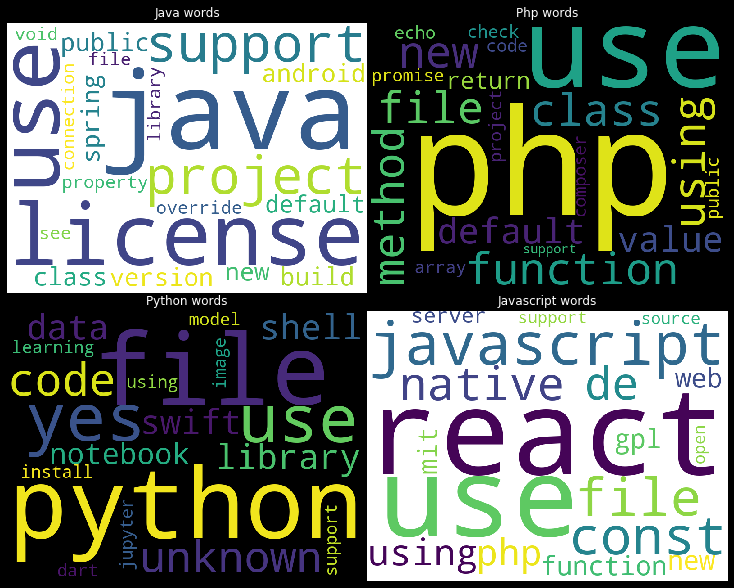

In [129]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, .5]), plt.axes([0, .5, .5, .5]), plt.axes([.5, 0, .5, .5]), plt.axes([.5, .5, .5, .5])]

axs[0].imshow(py_cloud)
axs[1].imshow(java_cloud)
axs[2].imshow(js_cloud)
axs[3].imshow(php_cloud)



axs[0].set_title('Python words')
axs[1].set_title('Java words')
axs[2].set_title('Javascript words')
axs[3].set_title('Php words')


for ax in axs: ax.axis('off')

Modeling

In [91]:
from pprint import pprint

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [104]:
raw_count = pd.Series(top_words)

Text(0.5, 1.0, '20 most common words')

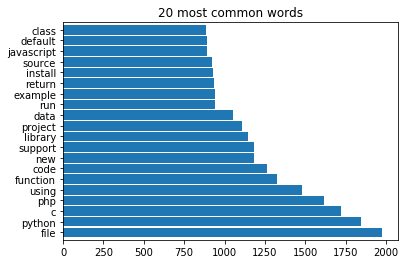

In [109]:
raw_count.sort_values(ascending=False)[0:20].plot.barh(width=.9)
plt.title('20 most common words')

In [111]:

# type(raw_count)

tf_df = pd.DataFrame({'raw_count': raw_count})

tf_df = tf_df.assign(frequency = lambda df: df.raw_count / df.raw_count.sum())

tf_df = tf_df.assign(augmented_frequency = lambda df: df.frequency / df.frequency.max())

tf_df.frequency.max()

tf_df.head(10)

,raw_count,frequency,augmented_frequency
file,1975,0.035749,1.000000
python,1846,0.033414,0.934684
c,1723,0.031188,0.872405
php,1615,0.029233,0.817722
using,1479,0.026771,0.748861
function,1325,0.023984,0.670886
code,1263,0.022861,0.639494
new,1184,0.021431,0.599494
support,1184,0.021431,0.599494
library,1148,0.020780,0.581266


In [112]:
tf_df = (pd.DataFrame({'raw_count': raw_count})
         .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
         .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

tf_df.head(6)

,raw_count,frequency,augmented_frequency
file,1975,0.035749,1.000000
python,1846,0.033414,0.934684
c,1723,0.031188,0.872405
php,1615,0.029233,0.817722
using,1479,0.026771,0.748861
function,1325,0.023984,0.670886


In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [118]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(top_words.values())

TypeError: 'numpy.ndarray' object is not callable